In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
#Generating Systhetic Linear Data
X=2*np.random.rand(100,1)
Y=4+3*X+np.random.rand(100,1)
#Create DataFrame

data=pd.DataFrame(np.hstack([X,Y]), columns=['X','Y'])
#Introduce missing data randomly in 'x' and 'Y'
missing_rate=0.1
n_missing_samples=int(np.floor(missing_rate * data.shape[0]))
missing_indices_X=np.random.choice(data.index, n_missing_samples, replace=False)
data.loc[missing_indices_X,'X']=np.nan
missing_indices_y=np.random.choice(data.index, n_missing_samples,replace=False)
data.loc[missing_indices_y,'Y']=np.nan
print("Generated dataset with missing values")
print(data.head(10))


Generated dataset with missing values
          X         Y
0  0.263173  4.929685
1  1.820145  9.466715
2       NaN  9.034972
3  0.666274       NaN
4  1.789019       NaN
5  0.554097  5.952223
6  0.965609  7.673870
7  0.010231  5.021570
8  0.254342  4.860121
9  1.298760  8.599937


In [9]:
data.isnull().sum()#Showing the missing valuews
mean=data['X'].mean()#replacing the missing values
data['X'].fillna(mean,inplace=True)

mean=data['Y'].mean()
data['Y'].fillna(mean, inplace=True)
#df.isnull().sum()

C:\Users\LabStudent\AppData\Local\Temp\ipykernel_13936\700081121.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['X'].fillna(mean,inplace=True)
C:\Users\LabStudent\AppData\Local\Temp\ipykernel_13936\700081121.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [11]:
X=data[['X']]
Y=data['Y']
model=LinearRegression()
model.fit(X,Y)
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 5.166864359721494
Coefficients: [2.56529352]


In [12]:

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.4, random_state=42)
print("Train",X_train)
print("Test:",X_test)

Train            X
49  1.292900
34  1.052262
7   0.010231
95  1.533116
27  0.885708
19  1.151356
81  1.052262
25  0.300298
62  1.826677
13  1.693904
24  0.857619
3   0.666274
17  1.877374
38  1.052262
8   0.254342
78  0.217578
6   0.965609
64  1.353830
36  1.649462
89  0.137205
56  0.888781
99  1.052262
54  0.563927
43  1.876629
50  0.383776
67  1.635497
46  1.968091
68  1.718655
61  1.564716
97  1.680199
79  1.052262
41  0.939427
58  1.994417
48  1.144064
98  1.052262
57  0.929923
75  1.844239
32  1.417749
94  0.149229
59  0.636662
63  1.531376
84  1.688228
37  0.446736
29  1.135051
1   1.820145
52  0.881549
21  1.904181
2   1.052262
23  0.861085
87  0.692319
91  0.100732
74  1.985363
86  1.263626
82  1.772249
20  0.098265
60  0.760622
71  0.356706
14  0.007792
92  1.634587
51  1.900970
Test:            X
83  1.735683
53  0.616152
70  0.068374
45  1.052262
44  1.986178
39  0.193836
22  1.093528
80  0.580522
10  1.039236
0   0.263173
18  1.628896
30  1.052262
73  0.617635
33  1.349745


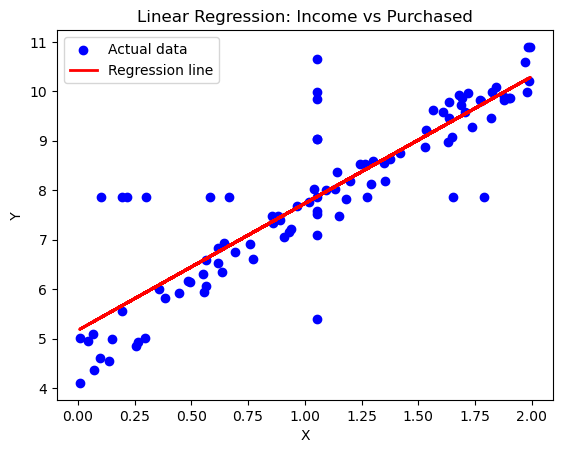

In [15]:
Y_pred = model.predict(X)
plt.scatter(X, Y, color='blue', label='Actual data') 
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel("X") 
plt.ylabel(" Y ") 
plt.title("Linear Regression: Income vs Purchased") 
plt.legend() 
plt.show()

In [69]:
Y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.6083169089796325
R-squared (R²): 0.7937347355213203
